<a href="https://colab.research.google.com/github/hung7405/Customer-Churn-Prediction/blob/main/Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Data and essential libraries**

In [1]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Saving Telco_customer_churn_data.csv to Telco_customer_churn_data.csv


In [2]:
df = pd.read_csv('Telco_customer_churn_data.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.shape

(7043, 21)

# **Cleaning Data**

In [5]:
df['TotalCharges'].replace(' ', pd.NA, inplace = True)

In [6]:
#Converting TotalCharges to numeric:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df['TotalCharges'].dtype

dtype('float64')

In [7]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [8]:
df[df['TotalCharges'].isna()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


This part for checking all the NaN is important or not.

In [9]:
df['TotalCharges'].isna().sum()

np.int64(11)

In [10]:
#Confirm numeric columns:
df[['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
df['Churn'].value_counts(normalize = True)

,proportion
Churn,
No,0.73463
Yes,0.26537


Target Variable: Churn ( Yes/ No Question)

Based on the data, arounf 26.5% of customer churned and 73 26.5% stayed, so ther is a imbalanced metric like accuracy ma by misleading.

In [12]:
df = df.dropna(subset =['TotalCharges'])

In [13]:
df.shape

(7032, 21)

In [14]:
df['TotalCharges'].isna().sum()

np.int64(0)

In [15]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


Frankly, the Telco customer churn is clean and clear enough, just need to work a liitle on the Total Charges for handeling missing data, and the method is drop all the NaN value. After checking all the NaN data and found that the NaN Total Charges data just take a small amount in the whole dataset.

In [16]:
# df.to_csv('Telco_customer_churn_data_clean.csv', index = False)

# files.download('Telco_customer_churn_data_clean.csv')

This scirpt is for export, download, and load the cleaned data into your local end-device

# **Exploratory Data Analysis (EDA)**

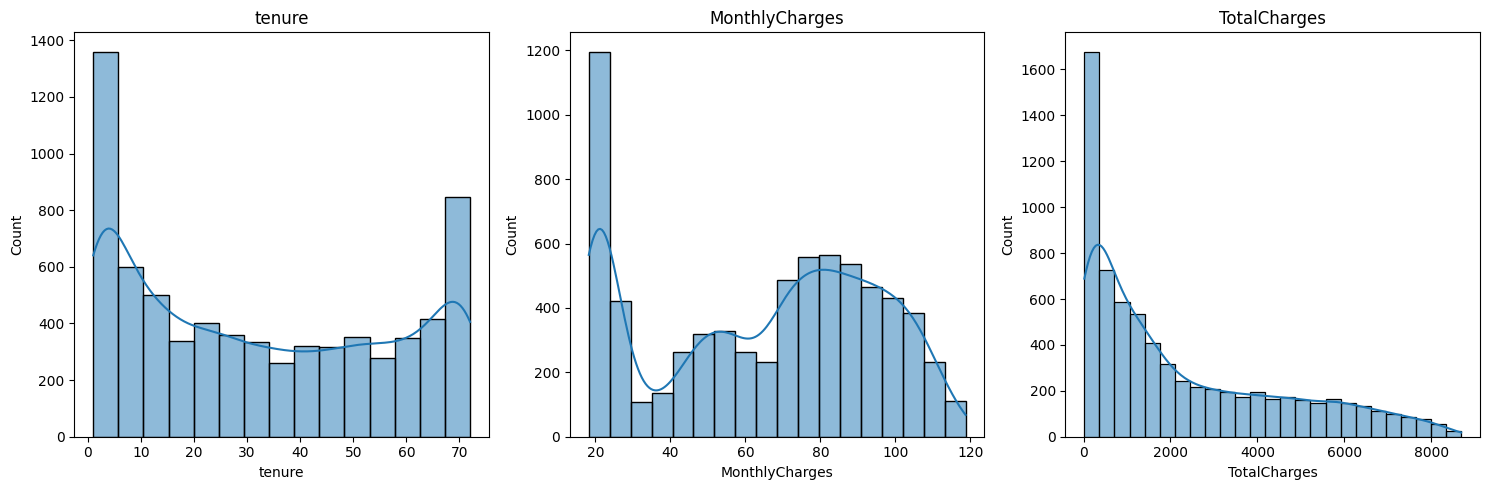

In [17]:
numeric_cols = ['tenure','MonthlyCharges','TotalCharges']

plt.figure(figsize= (15,5))
for i, col in enumerate(numeric_cols,1):
  plt.subplot(1,3,i)
  sns.histplot(data=df, x=col, kde = True)
  plt.title(col)

plt.tight_layout()

**tenure:** The histoplot show there are 3 groups of customer:

*   New customers (0–6 months): A large number of customers are very new to the service.
*   Mid-term customers (12–60 months): This is the largest segment, accounting for approximately 56% of all customers despite each bin appearing lower on the plot.

*   Long-term customers (65–72 months): A noticeable cluster of customers who have stayed with the service for many years.


This distribution suggests that most users who pass the initial few months tend to stay for several years, indicating higher retention among mid-term and long term customer.






**MonthlyCharges:** The histoplot show there are bimodal distribution:



*   Low-tier plan: the amount of money that customer charge for monthly in this around (20-40 USD). This is also the group that contain high churn posibility due to price sensitive, thay will leave if the price increase or end of trial.
*   Premium plan: the amount of money that customer charge for monthly in this around ( 70-120 USD). This group has a low churn percentage show the highe level of commitment and high use value

**NOTE:** in the range of (40-70 USD), there are customer shortage that suggest an opportunity to develop mid-tier plan to expland customer segment and revenue.



**TotalCharges:** The histoplot show right skewed distribution:


*   The chart show there's a large amount of customer who have low lifetime value ( approximately 4100 customer - 60% of Total) and the reason can be come from 'tenure'( tenure low => leave early )
*   The distribution also highlights a loyal customer segment whose TotalCharges exceed $2000, representing roughly 40% of the entire customer base.
Customers in this range typically have longer tenure and significantly lower churn rates, indicating strong loyalty and stable engagement with the service.



In [18]:
df[df['TotalCharges'] >= 2000].value_counts().sum()

np.int64(2856)

In [19]:
df[df['TotalCharges'] >= 2000].value_counts().sum() / df['TotalCharges'].value_counts().sum() *100

np.float64(40.61433447098976)

In [20]:
Mid_term =df[(df['tenure'] >=12) & (df['tenure'] <=65)].value_counts().sum()

In [21]:
Total= df['tenure'].value_counts().sum()

In [22]:
Mid_term / Total *100

np.float64(56.04379977246872)

In [23]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object' and col != 'customerID']
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [24]:
for col in ['gender', 'Contract', 'InternetService']:
    print(f'\n=== {col} ===')
    print(df.groupby(col)['Churn'].value_counts(normalize=True))


=== gender ===
gender  Churn
Female  No       0.730405
        Yes      0.269595
Male    No       0.737954
        Yes      0.262046
Name: proportion, dtype: float64

=== Contract ===
Contract        Churn
Month-to-month  No       0.572903
                Yes      0.427097
One year        No       0.887228
                Yes      0.112772
Two year        No       0.971513
                Yes      0.028487
Name: proportion, dtype: float64

=== InternetService ===
InternetService  Churn
DSL              No       0.810017
                 Yes      0.189983
Fiber optic      No       0.581072
                 Yes      0.418928
No               No       0.925658
                 Yes      0.074342
Name: proportion, dtype: float64


Text(0.5, 1.0, 'Churn rate by Contract')

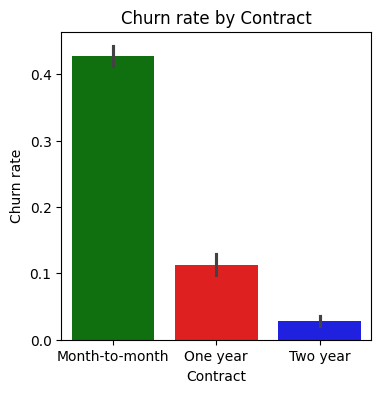

In [25]:
Churn_contract = ['green', 'red', 'blue']
plt.figure(figsize=(4,4))
sns.barplot(data=df, x='Contract', y=df['Churn'].map({'No':0,'Yes':1}), palette = Churn_contract)
plt.xlabel('Contract')
plt.ylabel('Churn rate')
plt.title('Churn rate by Contract')

Insight: Month-to month contracts have the highest churn rate ( around 43% ), while one-year contract and espeacially two-year contracts churn respectively is around 11% and 2%. The churn rate is relative to the time of the contract.

In [26]:
df.groupby('OnlineSecurity')['Churn'].value_counts(normalize=True)

OnlineSecurity       Churn
No                   No       0.582213
                     Yes      0.417787
No internet service  No       0.925658
                     Yes      0.074342
Yes                  No       0.853598
                     Yes      0.146402
Name: proportion, dtype: float64

Analysis of the Telco data reveals a strong correlation between the OnlineSecurity service and customer churn. Customers who do not subscribe to Online Security face a remarkably high churn rate of 41.78%, which is nearly three times higher than the 14.64% observed for those who do use the service. This significant difference highlights Online Security as a critical retention factor and suggests it should be strategically promoted to high-risk new customers.

In [27]:
df.groupby('TechSupport')['Churn'].value_counts(normalize=True)

TechSupport          Churn
No                   No       0.583525
                     Yes      0.416475
No internet service  No       0.925658
                     Yes      0.074342
Yes                  No       0.848039
                     Yes      0.151961
Name: proportion, dtype: float64

The analysis of Tech Support highlights its critical role as a retention service. Customers who do not subscribe to Tech Support face a high churn rate of 41.65%, which is significantly higher than the 15.20% churn rate observed for those who do use the service. This suggests that reliable technical assistance is a key differentiator in customer satisfaction and loyalty.

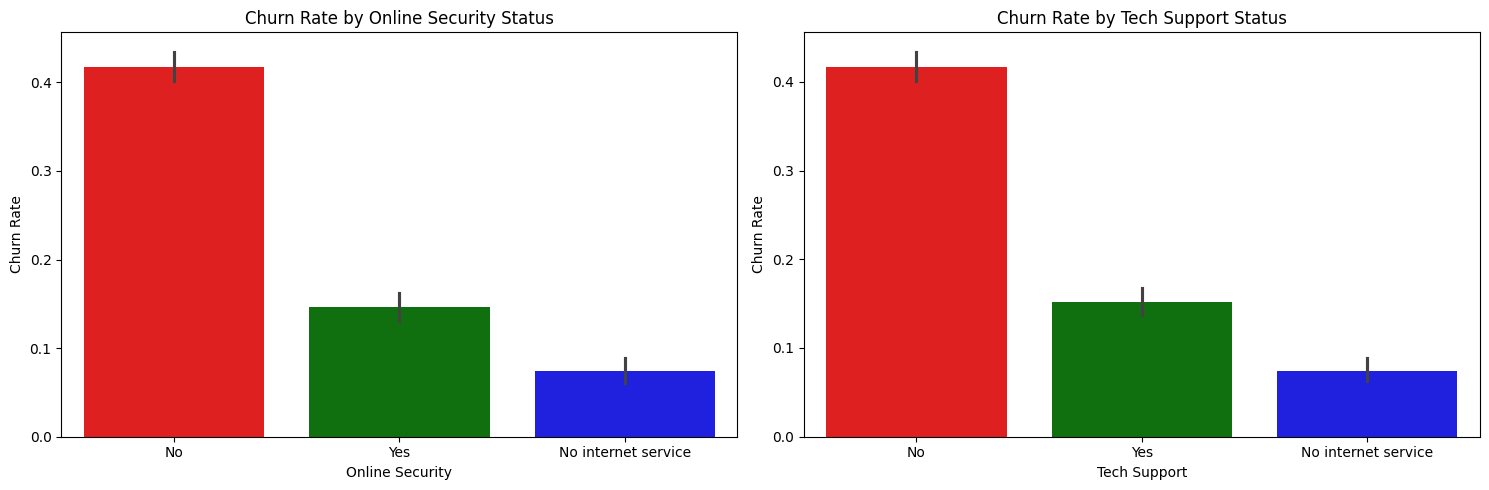

In [28]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
df['Churn_Numeric'] = df['Churn'].map({'Yes': 1, 'No': 0})

sns.barplot(
    x='OnlineSecurity',
    y='Churn_Numeric',
    data=df,
    ax=ax[0],
    palette=['red', 'green', 'blue']
)

sns.barplot(
    x='TechSupport',
    y='Churn_Numeric',
    data=df,
    ax=ax[1],
    palette=['red', 'green', 'blue']
)

ax[0].set(title='Churn Rate by Online Security Status', xlabel='Online Security', ylabel='Churn Rate')
ax[1].set(title='Churn Rate by Tech Support Status', xlabel='Tech Support', ylabel='Churn Rate')

plt.tight_layout()
plt.show()

In [29]:
df['No_Security_No_Support'] = (
    (df['OnlineSecurity'] == 'No') &
    (df['TechSupport'] == 'No')
).astype(int)

In [30]:
# No Security AND No Support
df.groupby('No_Security_No_Support')['Churn'].value_counts(normalize=True)

No_Security_No_Support  Churn
0                       No       0.86180
                        Yes      0.13820
1                       No       0.51038
                        Yes      0.48962
Name: proportion, dtype: float64

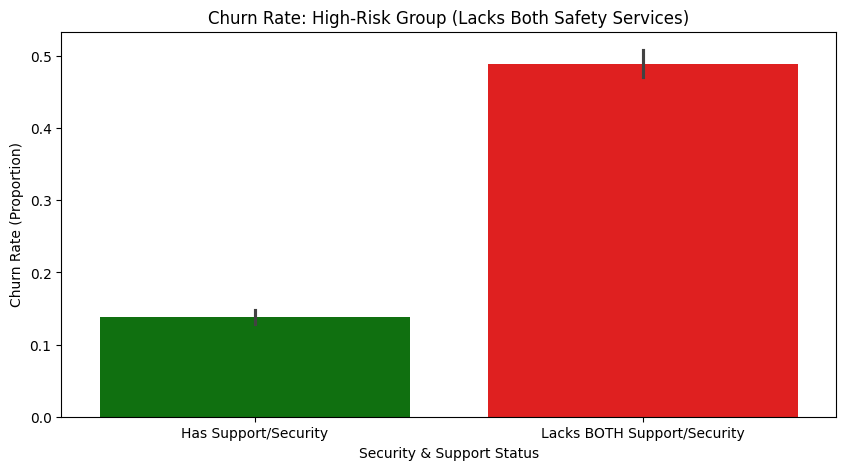

In [31]:
plt.figure(figsize=(10, 5))
sns.barplot(
    x='No_Security_No_Support',
    y='Churn_Numeric',
    data=df,
    palette=['green', 'red']
)


plt.xticks([0, 1], ['Has Support/Security', 'Lacks BOTH Support/Security'])
plt.title('Churn Rate: High-Risk Group (Lacks Both Safety Services)')
plt.xlabel('Security & Support Status')
plt.ylabel('Churn Rate (Proportion)')

plt.show()

The churn rate for the group lacking both services ($\text{No_Security_No_Support} = 1$) stands at 48.96%.Comparison: This rate is 3.5 times higher than the group with at least one security/support service ($\text{No_Security_No_Support} = 0$), whose churn rate is only 13.82%.Key Conclusion: This 48.96% churn rate represents the highest risk level in the entire analysis, surpassing even the Month-to-month contract group (43%) and the single lack of Tech Support group (41.6%). This proves that the combined absence of both support and security services creates a major vulnerability, almost certainly leading to customer attrition.

**Actionable Recommendation:**
The customer segment lacking both Online Security and Tech Support should be the Number 1 priority target for retention campaigns, due to their high churn rate of nearly 49%. The company should immediately deploy a 'Safety Net Bundle' including both services with the approriate price, aimed directly at this high-risk segment.

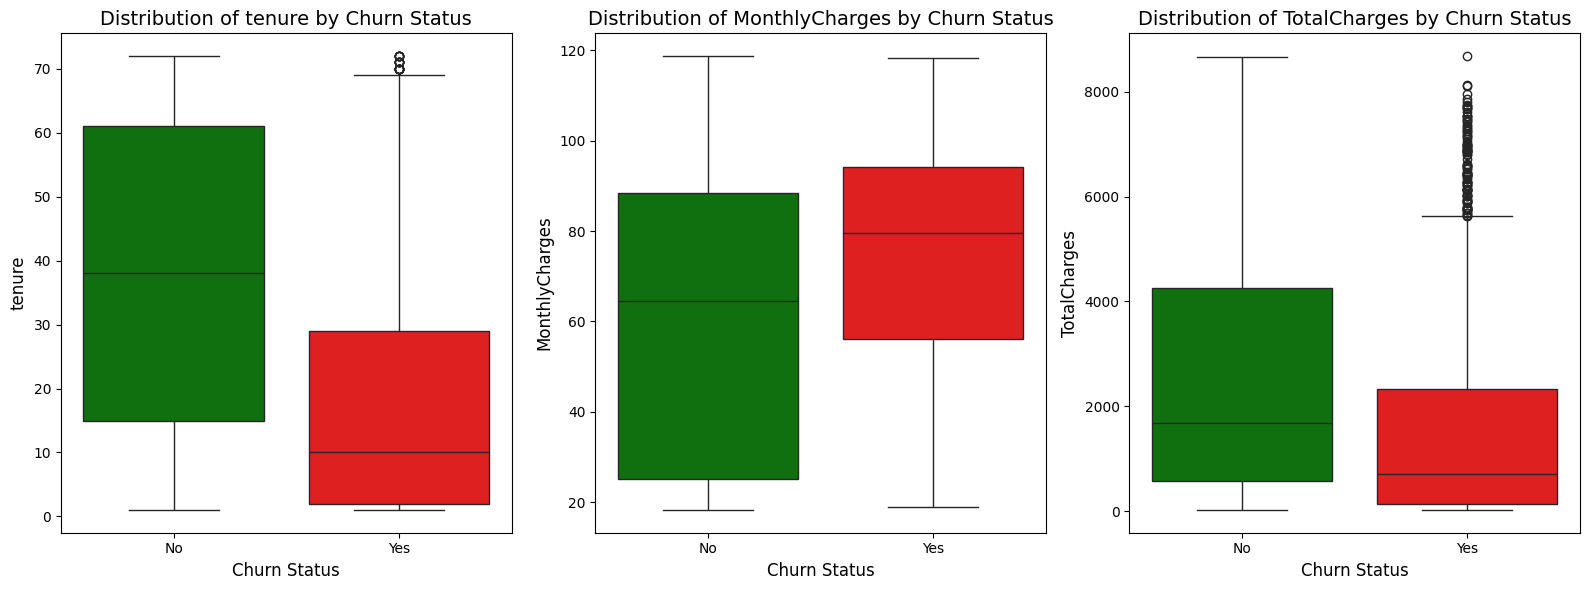

In [32]:
plt.figure(figsize=(16, 6))

for i, col in enumerate(numeric_cols, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(x='Churn', y=col, data=df, palette=['green', 'red'])
    plt.title(f'Distribution of {col} by Churn Status', fontsize=14)
    plt.xlabel('Churn Status', fontsize=12)
    plt.ylabel(col, fontsize=12)

plt.tight_layout()
plt.show()

## **Analysis Plan:**
* Churn propotion of Add on Services
* Churn propotion of PaymentMethod
* Churn propotion of SeniorCitizen, check their any relationship between SeniorCitizen and tenure, SeniorCitizen and payment method, relationship SeniorCitizen and (Charges), SeniorCitizen with 3 above

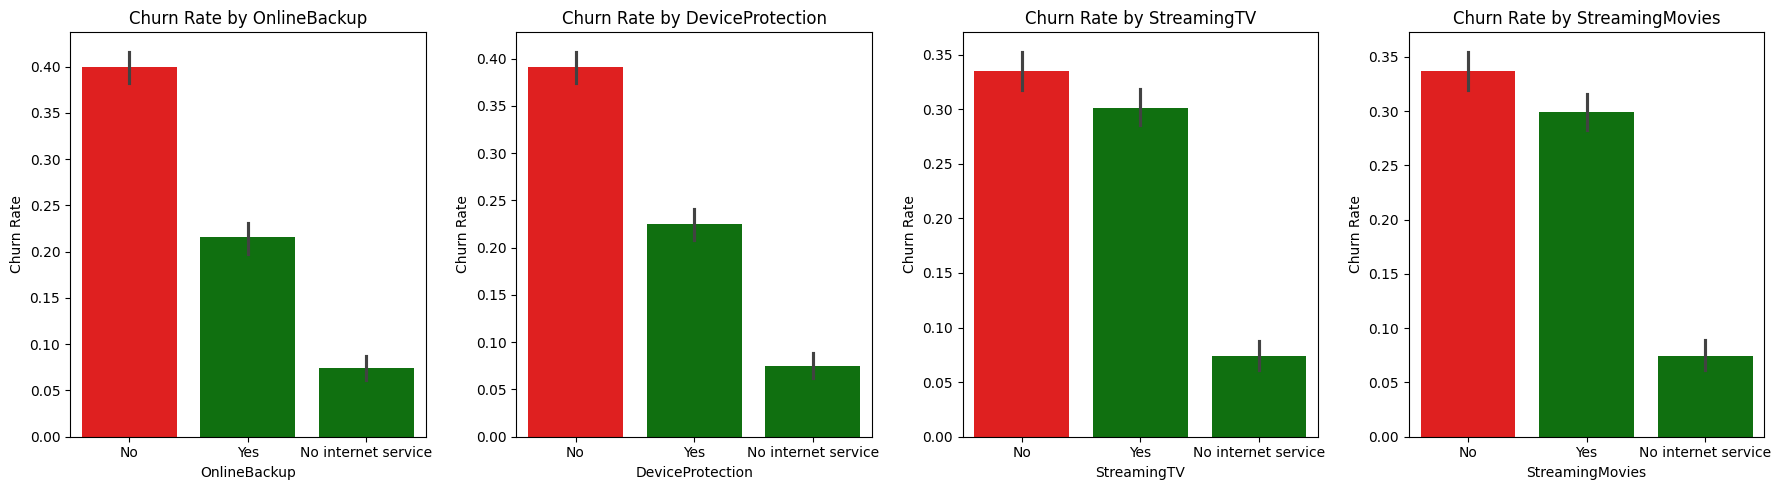

In [33]:
addon_cols = ['OnlineBackup', 'DeviceProtection', 'StreamingTV', 'StreamingMovies']

#visualize charts for Churn propotion of Add on Services

plt.figure(figsize=(18, 5))

for i, col in enumerate(addon_cols, 1):
    plt.subplot(1, 4, i)

    sns.barplot(x=col, y='Churn_Numeric', data=df, order= ['No', 'Yes', 'No internet service'] ,palette={'Yes':'green', 'No':'red', 'No internet service': 'green'})
    plt.title(f'Churn Rate by {col}', fontsize=12)
    plt.xlabel(col, fontsize=10)
    plt.ylabel('Churn Rate', fontsize=10)

plt.tight_layout()
plt.show()

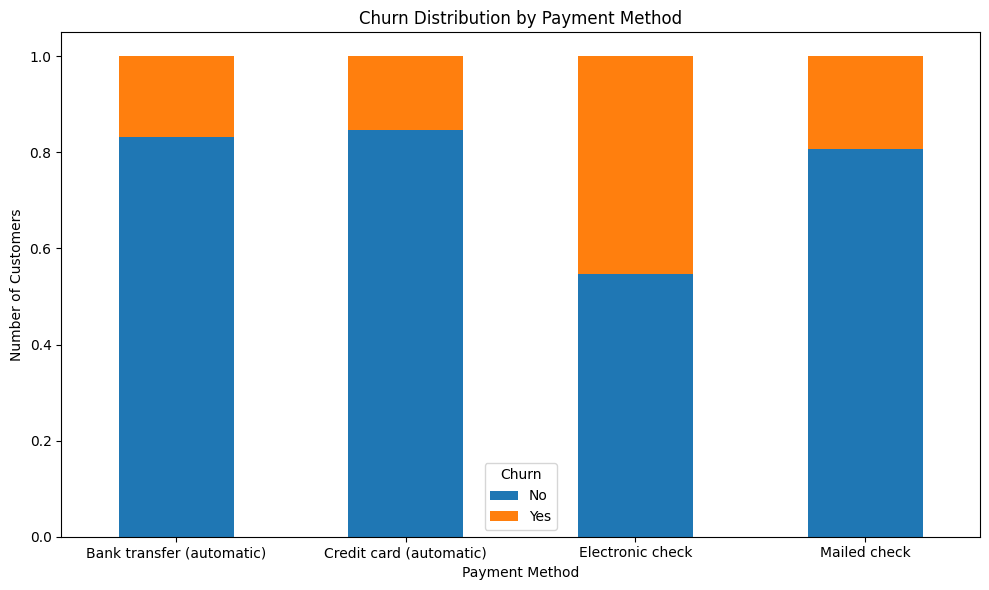

In [34]:
stacked_df = (
    df.groupby(['PaymentMethod', 'Churn_Numeric'])
      .size()
      .unstack(fill_value=0)
      .rename(columns={0: 'No', 1: 'Yes'})
      .apply (lambda x: x / x.sum(), axis=1)
)

# stacked bar
stacked_df.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6)
)

plt.title('Churn Distribution by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Number of Customers')
plt.legend(title='Churn')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Churn propotion of SeniorCitizen, this chart to check out there are any relationship between Age and Churn.

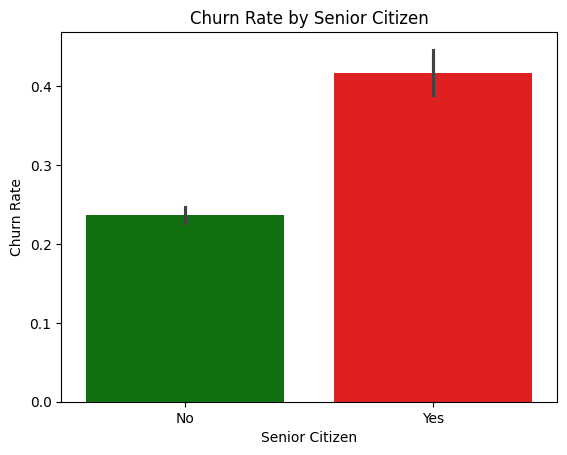

In [35]:
df['SeniorCitizen'].unique()

sns.barplot(x= 'SeniorCitizen', y= 'Churn_Numeric', data=df, palette={'0':'green', '1':'red'})
plt.xticks([0, 1], ['No', 'Yes'])
plt.title('Churn Rate by Senior Citizen')
plt.xlabel('Senior Citizen')
plt.ylabel('Churn Rate')

plt.show()


This chart illustrates the churn rate by senior citizen status to examine the relationship between age and customer churn.
The results show that senior customers exhibit a significantly higher churn rate compared to non-senior customers.

Suggesting:
* Simpler pricing plans

* Enhanced customer support tailored for senior customers

* Special pricing or loyalty programs for older customer segments

# **Modeling ( Logistic Regession and Random Forest)**

In [36]:
df['ChurnFlag'] = df['Churn'].map({'No': 0, 'Yes': 1})
df['ChurnFlag'].value_counts()

,count
ChurnFlag,
0,5163
1,1869


I decided to split the data into train data and test data. the ratio is selected in these model is 80 for training and 20 for testing.


In [37]:
df= df.drop(columns=['customerID'])

In [38]:
# Defining X (Feature) and Y (Target)

target = 'ChurnFlag'
X = df.drop(columns=['Churn', 'ChurnFlag','Churn_Numeric'])
y = df[target]

In [39]:
# Separating numeric columns and categorial columns

num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_cols = [col for col in X.columns if col not in num_cols]

# **Logistic Regession**

Logistic Regression in a pipeline with one-hot encoding. Test accuracy is approximately 0.80.

For churners (class 1), precision ≈0.64, recall ≈ 0.57, f1 ≈ 0.60



In [40]:
# spliting data for X and Y which each of them contain for testing and training

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape

(5625, 20)

In [41]:
#preprocessing: one-hot for categoricals, pass-through for numerics
preprocess = ColumnTransformer(
transformers=[
('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols),
('num', 'passthrough', num_cols)
]
)

log_reg = LogisticRegression(max_iter=1000)

clf = Pipeline(steps=[
('preprocess', preprocess),
('model', log_reg)
])

clf.fit(X_train, y_train)#

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod',
                                                   'No_Security_No_Support']),
                                                 ('num', 'passthrough',
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('model', LogisticRegression(max_iter=1000))])

## **Evaluate Logistic Model**




In [42]:
y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[908 125]
 [160 214]]
              precision    recall  f1-score   support

           0       0.85      0.88      0.86      1033
           1       0.63      0.57      0.60       374

    accuracy                           0.80      1407
   macro avg       0.74      0.73      0.73      1407
weighted avg       0.79      0.80      0.79      1407



# **Random Forest**

In [43]:
rf_model = RandomForestClassifier(
n_estimators=200,
max_depth=None,
random_state=42,
class_weight='balanced',
n_jobs=-1
)

rf_clf = Pipeline(steps=[
('preprocess', preprocess), # same preprocess as before
('model', rf_model)
])

rf_clf.fit(X_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'SeniorCitizen',
                                                   'Partner', 'Dependents',
                                                   'PhoneService',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'PaymentMethod',
                                                   'No_Security_No_Support']),
                                                 ('num', 'passthrough',
                                                  ['tenure', 'MonthlyCharges',
                                                   'TotalCharges'])])),
                ('model',
                 RandomForestClassifier(class_weight='balanced',
                                        n_estimators=200, n_jobs=-1,
                                        random_state=42))])

## **Evaluate Random Forest model**

In [44]:
rf_pred = rf_clf.predict(X_test)

print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

[[918 115]
 [194 180]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.61      0.48      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.70      1407
weighted avg       0.77      0.78      0.77      1407



After training and testing 2 models which are Logistic Regression and Random Forest. There are some important properties in these 2 models helping select the final model.


  

  * In Logistic Regression model reaches about 80% accuracy, the perforamnce in pridicting non-churn is quite well with (recall ~89%), in stead of churners (recall 57%).


  * In Random Forest model with class_weight = 'balance' archived lower recall(~48%) in churners and f1(f1-score ~55%).




For archiving a better result of predicting, Logistic Regression model is going to be selected as the final model due to higher performance parameters.



# **Feature importance and business insights**

In [45]:
ohe = rf_clf.named_steps['preprocess'].named_transformers_['cat']  #Get feature names after preprocessing
cat_feature_names = ohe.get_feature_names_out(cat_cols)
all_feature_names = np.concatenate([cat_feature_names, np.array(num_cols)])

In [46]:
#Get importances
importances = rf_clf.named_steps['model'].feature_importances_

fi = pd.DataFrame({
'feature': all_feature_names,
'importance': importances
}).sort_values(by='importance', ascending=False)

fi.head(10)

,feature,importance
47,TotalCharges,0.139155
45,tenure,0.124146
46,MonthlyCharges,0.119997
34,Contract_Month-to-month,0.073496
43,No_Security_No_Support_0,0.029484
44,No_Security_No_Support_1,0.028658
36,Contract_Two year,0.027302
16,OnlineSecurity_No,0.027219
41,PaymentMethod_Electronic check,0.025117
25,TechSupport_No,0.021869


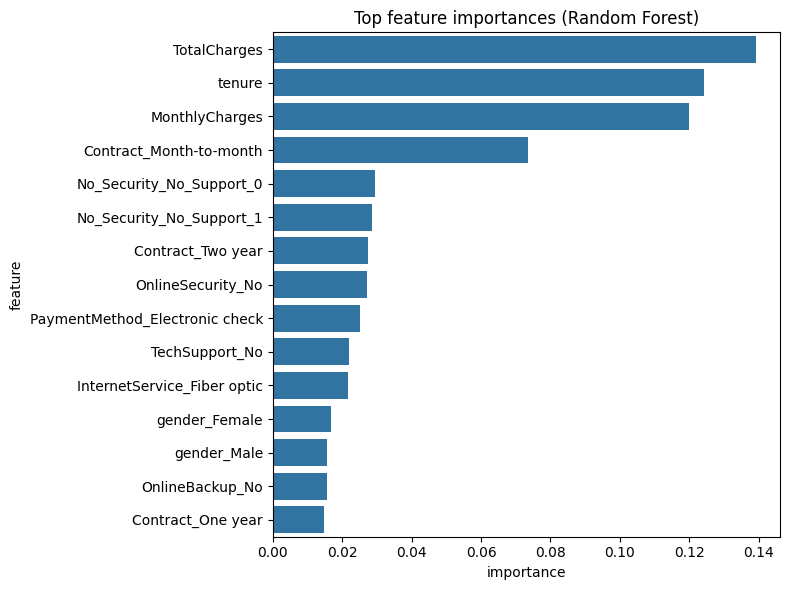

In [47]:
top_n = 15
plt.figure(figsize=(8, 6))
sns.barplot(data=fi.head(top_n), x='importance', y='feature')
plt.title('Top feature importances (Random Forest)')
plt.tight_layout()

Key Drivers of Attrition (Feature Importance Analysis):

* Financial Impact: There is a positive correlation between billing magnitude (both $MonthlyCharges$ and $TotalCharges$) and churn propensity, indicating that premium-priced segments are more susceptible to attrition.

* Customer Lifecycle Tenure: Nascent subscribers exhibit a significantly higher churn rate, underscoring the critical nature of the initial onboarding phase for long-term retention.

* Contractual Commitment: Month-to-month arrangements present a disproportionately higher risk profile compared to multi-year commitments, validating that long-term contracts serve as an effective deterrent to churn.

* Service Diversification (Add-ons): The absence of technical value-added services, specifically $OnlineSecurity$ and $TechSupport$, acts as a primary driver for service cancellation, suggesting these features function as customer "anchors."

* Payment Friction: Payment via electronic check is identified as a high-risk factor, potentially highlighting a customer segment characterized by lower brand loyalty or recurring billing complications.

# **Limitations and next steps**

This analysis uses one historical dataset from a single telecom company so this results may not generalize to all markets.

The current dataset is relatively straightforward, consisting primarily of binary 'Yes/No' values and 'No internet service' categories, which may limit its real-world complexity. As this is my first project exploring and experimenting with churn prediction, it has served as a valuable foundational exercise.

Moving forward, I plan to work with a more complex and practical dataset. My next objective is to conduct a deeper end-to-end analysis, including advanced Data Cleaning, comprehensive EDA, and a business-centric approach to customer behavior. I aim to address real-world business challenges, answer critical industry questions, and train more sophisticated predictive models to drive actionable insights.